<a href="https://colab.research.google.com/github/Vikramsrini/LSTM_machine_failiure_prediction/blob/main/LSTM_Machine_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Time series Ml/predictive_maintenance_10k.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
print(df.columns.tolist())

['timestamp', 'machine_id', 'air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure', 'failure_type', 'last_maintenance', 'maintenance_type']


In [ ]:
# Assuming your dataframe is named 'df' and the target variable is 'failure'

# Extract the relevant features and target variable
data = df[['timestamp', 'machine_id', 'air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure', 'failure_type', 'last_maintenance', 'maintenance_type']] # Changed from single brackets to double brackets to select multiple columns

<Axes: xlabel='failure', ylabel='count'>

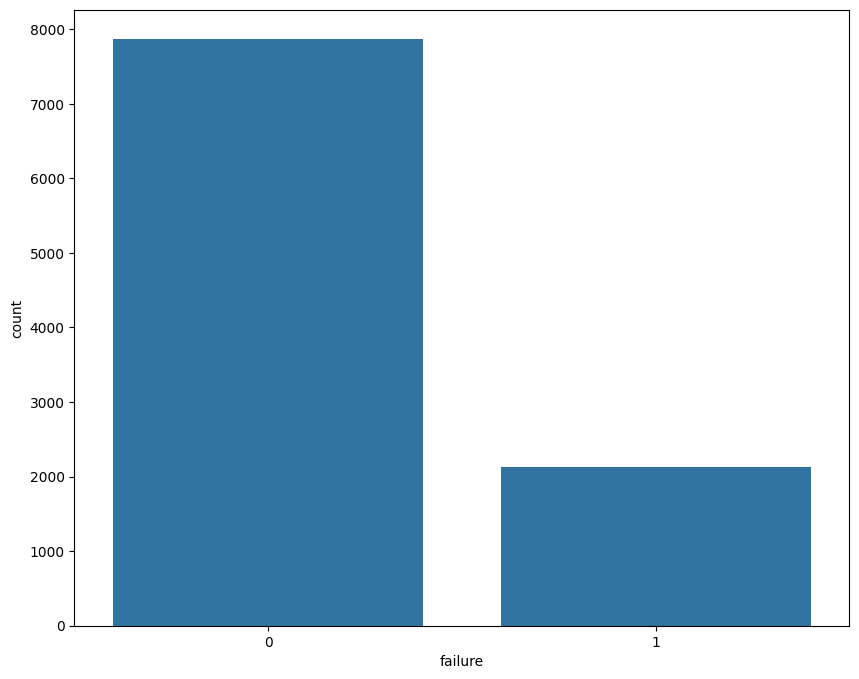

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module
import seaborn as sns # Import the seaborn module
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="failure")

<Axes: xlabel='failure_type', ylabel='count'>

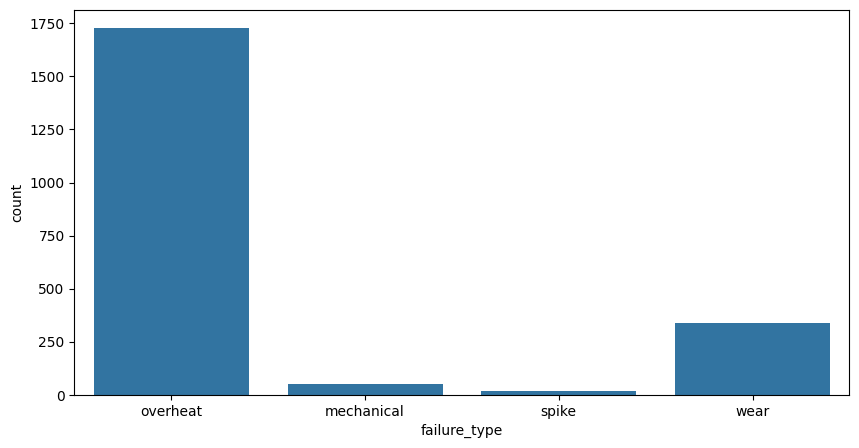

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['failure']==1],x="failure_type")

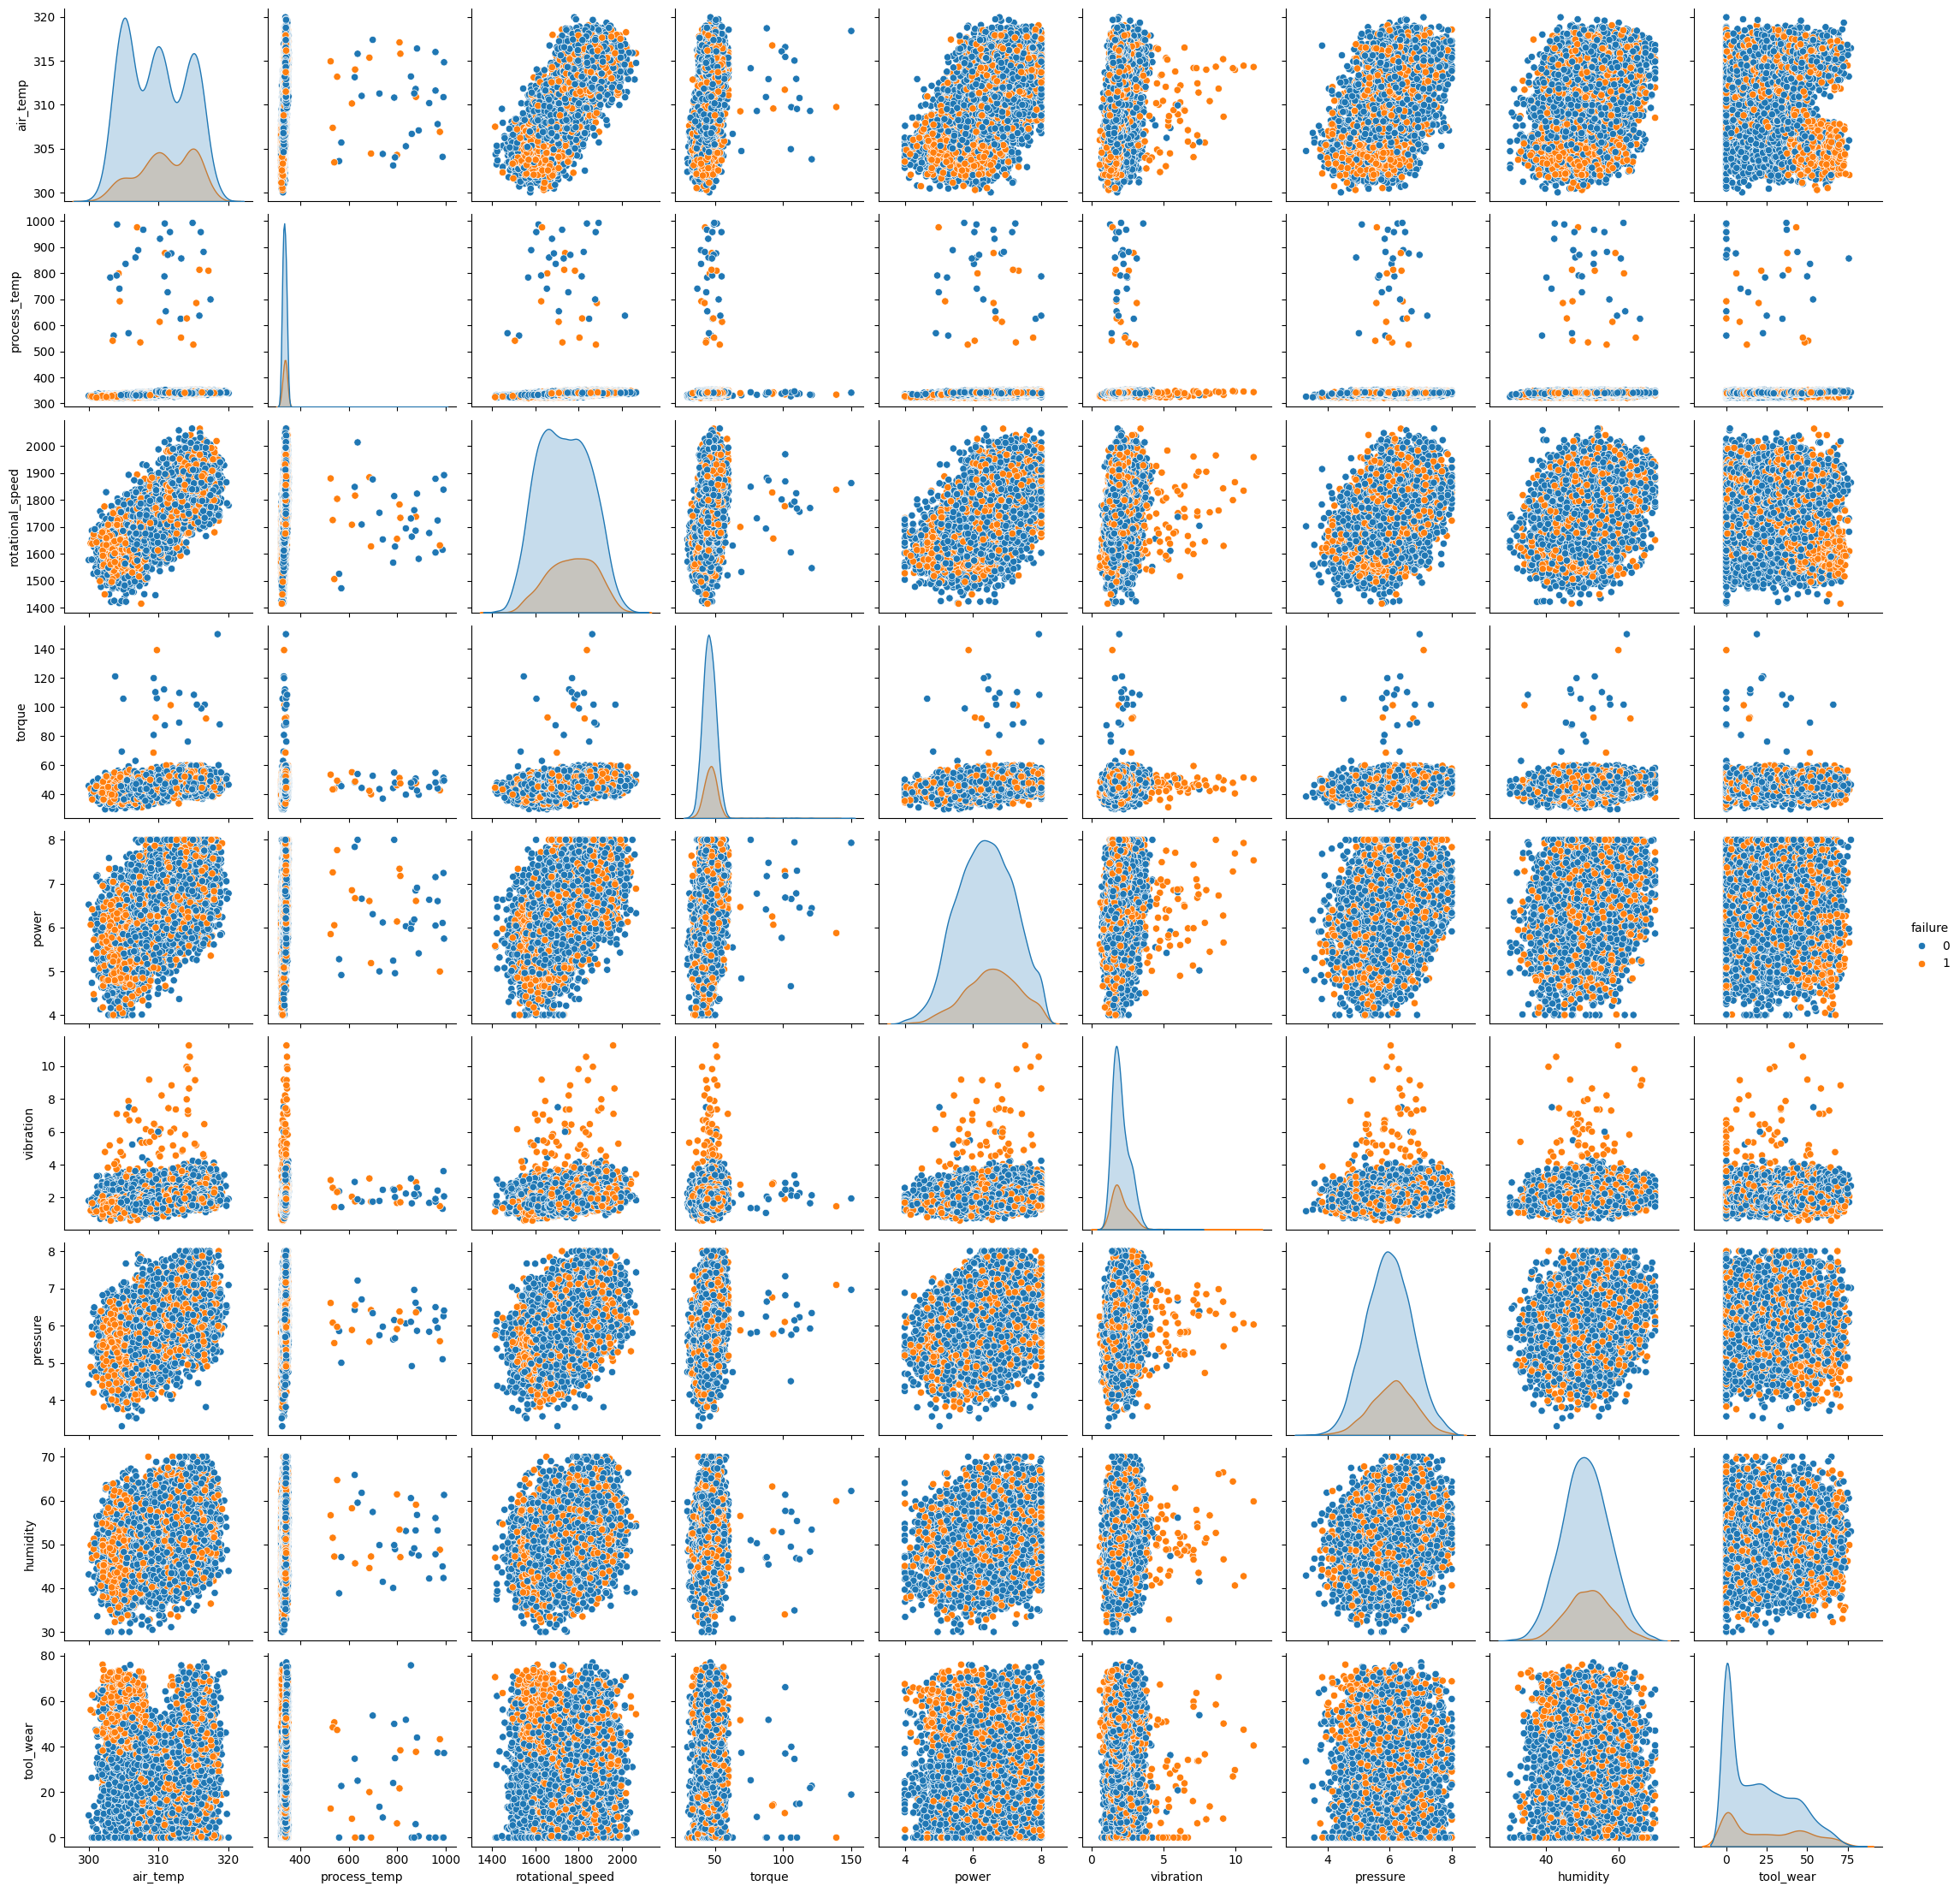

In [ ]:
sns.pairplot(data,hue='failure')

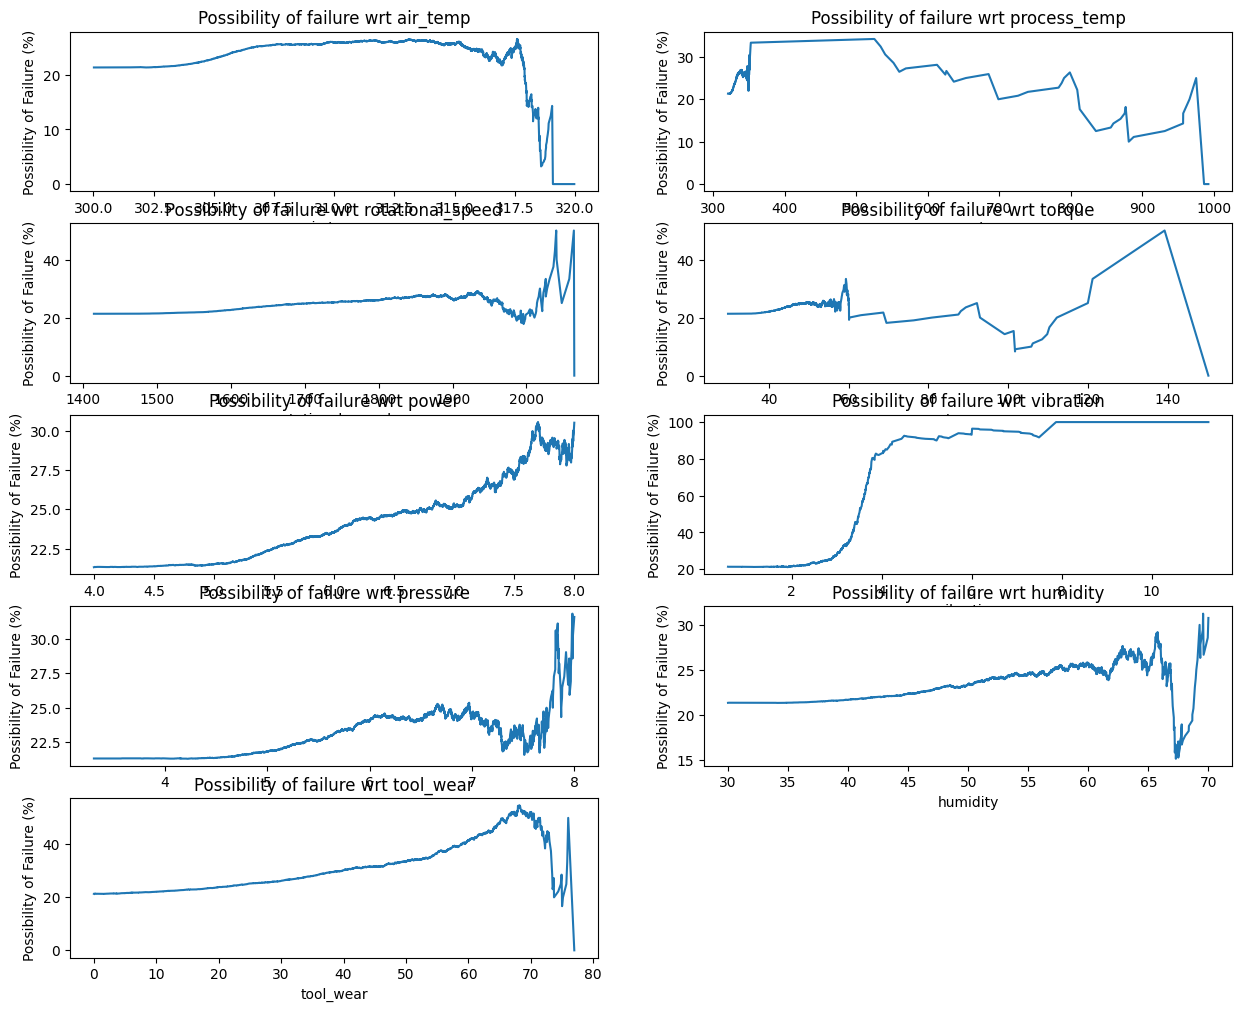

In [ ]:
def feat_prob(feature,df):
    x,y = [],[]
    for j in df[feature].unique():
        temp = df
        temp = temp[temp[feature]>=j]
        y.append(round((temp.failure.mean()*100),2))
        x.append(j)
    return(x,y)
plt.figure(figsize=(15,17))
m=1
# Adjust the subplot grid to accommodate all features
num_features = len(['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure', 'failure_type', 'last_maintenance', 'maintenance_type'])
num_rows = (num_features + 1) // 2  # Calculate the number of rows needed
num_cols = 2  # Keep 2 columns

for i in ['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear'] :
    plt.subplot(num_rows, num_cols, m).set_title(label=("Possibility of failure wrt "+i)) # Updated subplot with dynamic grid
    x,y = feat_prob(i,data)
    plt.xlabel(i)
    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x)
    m+=1

In [ ]:
# Convert timestamp to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
# Set timestamp as index
data = data.set_index('timestamp')

In [ ]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)  # Maintain temporal order


In [ ]:
# Scale the features using MinMaxScaler
#scaler = MinMaxScaler()
# Exclude 'timestamp' from scaling as it's the index
# Exclude 'machine_id', 'failure_type', 'maintenance_type', 'last_maintenance' from scaling as they are categorical or date-like
#features_to_scale = ['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure']  # Removed 'last_maintenance'
#train_data[features_to_scale] = scaler.fit_transform(train_data[features_to_scale])
#test_data[features_to_scale] = scaler.transform(test_data[features_to_scale])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, train_data[['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure']].shape[1])))  # Changed input shape
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification for failure prediction

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_data['failure']), y=train_data['failure'])
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Train the model
# Reshape to (samples, timesteps, features) - Assuming 1 timestep per sample
# Correct the columns to match the input shape and select only numerical features
model.fit(train_data[['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure']].values.reshape(-1, 1, train_data[['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure']].shape[1]),
          train_data['failure'].values, epochs=10, batch_size=64)  # Adjust hyperparameters as needed

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7980 - loss: 0.5566
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.5038
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.5035
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4969
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4988
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.5072
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4914
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4994
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.5057
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8016 - loss: 0.4984


In [ ]:
# Make predictions on the test set
# Replace 'feature1', 'feature2', ... with actual feature columns from your data
predictions = model.predict(test_data[['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure']].values.reshape(-1, 1, test_data[['air_temp', 'process_temp', 'rotational_speed', 'torque', 'power', 'vibration', 'pressure', 'humidity', 'tool_wear', 'failure']].shape[1]))
# The reshape should match the input shape of your LSTM model

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(test_data['failure'], (predictions > 0.5).astype(int))
precision = precision_score(test_data['failure'], (predictions > 0.5).astype(int))
recall = recall_score(test_data['failure'], (predictions > 0.5).astype(int))
roc_auc = roc_auc_score(test_data['failure'], predictions) # Use predictions probabilities for ROC AUC

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.7305
Precision: 0.0
Recall: 0.0
ROC AUC: 0.503706765513747


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


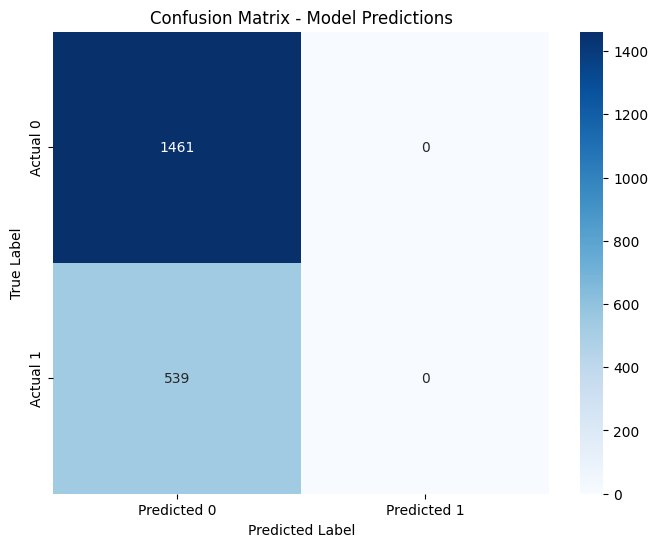

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


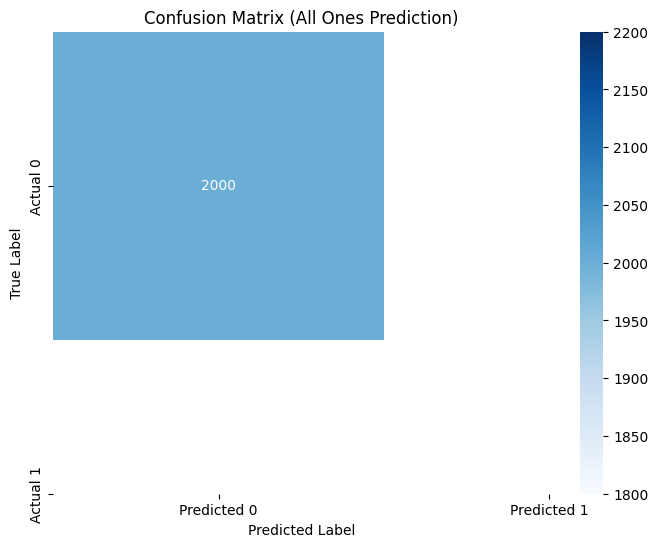

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Actual predictions
cm = confusion_matrix(test_data['failure'], (predictions > 0.5).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - Model Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# All ones prediction (for demonstration only — not realistic)
all_ones_predictions = np.ones_like(predictions)
all_ones_true = np.ones_like(test_data['failure'])

cm_all_ones = confusion_matrix(all_ones_true, all_ones_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_all_ones, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix (All Ones Prediction)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
